In [1]:
#importing all the necessary libraries
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import tree
from sklearn import naive_bayes
from sklearn import neighbors

#loading the dataset
data=pd.read_csv('dataset - dataset.csv')
data.head()

,patient number,Name,sex,age,chest pain,resting blood pressure,cholestrol,fasting blood sugar,resting electrocardiographic,maximum heart rate achieved,...,pulse rate,smoking,left anterior descending,circumflex artery,right coronary artery,obtuse marginal,left posterior descending artery,left coronary artery,stent,Unnamed: 25
0,1368.0,KESHAV PADHYAY,M,52.0,0.0,125,212.0,0.0,1.0,168.0,...,91.0,yes,50-60,NaN,80-90,20-30,NaN,30-40,1.0,NaN
1,1877.0,VINOD NAIDU,M,53.0,0.0,140,203.0,1.0,0.0,155.0,...,61.0,YES,70-80,NaN,40-50,NaN,NaN,NaN,1.0,NaN
2,4289.0,SAURABH MUKHTAR,M,70.0,1.0,145,274.0,0.0,1.0,125.0,...,165.0,NO,80-90,50-60,70-80,NaN,30-40,NaN,2.0,NaN
3,3216.0,ARJUN DESHMUKH,m,61.0,0.0,148,203.0,0.0,1.0,161.0,...,78.0,NO,40-50,50-60,70-80,40-50,NaN,NaN,1.0,NaN
4,1626.0,GAURI VAID,F,62.0,1.0,138,294.0,1.0,1.0,106.0,...,124.0,no,60-70,NaN,NaN,NaN,40-50,20-30,0.0,NaN


In [2]:
#display the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
patient number                      371 non-null float64
Name                                492 non-null object
sex                                 491 non-null object
age                                 492 non-null float64
chest pain                          473 non-null float64
resting blood pressure              445 non-null object
cholestrol                          441 non-null float64
fasting blood sugar                 457 non-null float64
resting electrocardiographic        456 non-null float64
maximum heart rate achieved         460 non-null float64
oldpeak                             455 non-null object
slope                               390 non-null float64
exang                               394 non-null float64
body mass index                     500 non-null float64
Admit Date                          372 non-null object
Discharge Date                      372 non-n

In [3]:
#finding the number of null values in each column
data.isnull().sum()

patient number                      129
Name                                  8
sex                                   9
age                                   8
chest pain                           27
resting blood pressure               55
cholestrol                           59
fasting blood sugar                  43
resting electrocardiographic         44
maximum heart rate achieved          40
oldpeak                              45
slope                               110
exang                               106
body mass index                       0
Admit Date                          128
Discharge Date                      128
pulse rate                           20
smoking                              39
left anterior descending             83
circumflex artery                   316
right coronary artery               171
obtuse marginal                     329
left posterior descending artery    314
left coronary artery                330
stent                                 8


In [4]:
#replacing the column names as per our convenience
df=data.rename(columns=({'patient number':'p_no','resting blood pressure':'rbp','cholestrol':'chol','fasting blood sugar':'fbs'\
                          ,'resting electrocardiographic':'recg','maximum heart rate achieved':'max_hrt','body mass index':'bmi'\
                         ,'Admit Date':'adm_dt','Discharge Date':'dis_dt','pulse rate':'pulse_rate','left anterior descending':'LAD','circumflex artery':'CA'\
                         ,'right coronary artery':'RCA','obtuse marginal':'OM','left posterior descending artery':'LPD'\
                         ,'left coronary artery':'LCA'}))

In [5]:
#displaying the structure to make sure that our column names have been successfully changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
p_no           371 non-null float64
Name           492 non-null object
sex            491 non-null object
age            492 non-null float64
chest pain     473 non-null float64
rbp            445 non-null object
chol           441 non-null float64
fbs            457 non-null float64
recg           456 non-null float64
max_hrt        460 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
bmi            500 non-null float64
adm_dt         372 non-null object
dis_dt         372 non-null object
pulse_rate     480 non-null float64
smoking        461 non-null object
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed:

In [6]:
#convert all the values to uppercase
df["sex"]=df["sex"].str.upper()

In [7]:
#find out all the unique values of column 'sex'
df['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [8]:
#as all the data is in same foramt so there is no need of any change at this point

In [9]:
#find out all the unique values of column 'chest pain' along with its frequency
df['chest pain'].value_counts()

0.0    205
2.0    150
1.0     88
3.0     30
Name: chest pain, dtype: int64

In [10]:
#as all the data is in same foramt so there is no need of any change at this point

In [11]:
#find out all the unique values of column 'smoking' along with its frequency
df["smoking"].value_counts()

YES    166
NO     142
no      59
yes     55
Yes     18
No      11
yeS      3
N0       2
yEs      2
n0       1
YeS      1
.        1
Name: smoking, dtype: int64

In [12]:
#as the data was incosistent,we converted all the entries to upper case
df["smoking"]=df["smoking"].str.upper()

In [13]:
#find out all the unique values of column 'smoking' along with its frequency
df["smoking"].value_counts()

YES    245
NO     212
N0       3
.        1
Name: smoking, dtype: int64

In [14]:
#as the data is still inconsistent,we made the required changes
df['smoking']=df['smoking'].replace({"N0":"NO",'.':'NO'})

In [15]:
df["smoking"].value_counts()

YES    245
NO     216
Name: smoking, dtype: int64

In [16]:
#now the data of column 'smoking' is consistent

In [17]:
#find out all the unique values of column 'age' 
df['age'].unique()

array([52., 53., 70., 61., 62., 58., 63., 55., 46., 54., 71., 43., 34.,
       51., 50., 60., 67., 45., 42., 44., 56., 57., 59., 64., 65., 41.,
       66., 38., 49., 48., 29., 37., 47., 68., 76., 40., 39., 77., 69.,
       35., 74., nan])

In [18]:
#as all the data is in same foramt so there is no need of any change at this point

In [19]:
#find out all the unique values of column 'rbp' along with its frequency
df["rbp"].value_counts()

130    53
120    50
140    40
110    31
150    31
160    21
138    19
128    17
132    15
125    14
118    12
124    10
152     9
122     8
170     8
112     8
108     8
134     7
100     7
135     6
146     5
145     5
115     4
142     4
136     4
126     4
178     3
94      3
192     3
144     3
105     3
148     3
165     2
117     2
200     2
102     2
114     2
174     2
123     2
180     2
129     2
104     2
106     1
ca      1
164     1
230     1
155     1
154     1
172     1
Name: rbp, dtype: int64

In [20]:
#as the data is inconsistent,we made the required changes
df['rbp']=df['rbp'].replace({"ca":"NaN"})

In [21]:
#find out all the unique values of column 'rbp' ato make sure that our changes are made
df['rbp'].unique()

array(['125', '140', '145', '148', '138', '100', '114', '160', '120',
       '122', '112', '132', '118', '128', '124', '106', '104', '135',
       '130', '136', '180', '129', '150', '178', '146', '117', '152',
       '154', '170', '134', '174', '144', '108', '123', '110', '142',
       '126', nan, '230', '192', '115', '94', '200', '165', '102', '105',
       'NaN', '155', '172', '164'], dtype=object)

In [22]:
#find out all the unique values of column 'chol'
df['chol'].unique()

array([212., 203., 274., 294., 248., 318., 289., 249., 286., 149., 341.,
       210., 280., 204., 308., 266., 244., 211., 185., 223., 208., 252.,
       209., 307., 233., 319., 256., 327., 169., 131., 269., 196., 231.,
       213., 271., 263., 229., 360., 258., 330., 342., 226., 228., 278.,
        nan, 283., 241., 175., 188., 217., 193., 245., 232., 288., 197.,
       315., 215., 164., 326., 207., 177., 257., 255., 187., 201., 220.,
       268., 267., 236., 303., 282., 126., 309., 186., 275., 299., 281.,
       206., 335., 218., 254., 295., 260., 240., 302., 192., 225., 325.,
       235., 234., 182., 167., 172., 298., 321., 300., 199., 157., 304.,
       222., 184., 136., 160., 247., 239., 246., 109., 180., 250., 221.,
       104., 200., 227., 178., 243., 261., 242., 205., 306., 230., 144.,
       219., 353., 198., 194., 183., 237., 224., 265., 123., 270., 163.,
       216., 276., 322., 214., 273., 253., 176., 354., 305., 168., 564.,
       313.])

In [23]:
#as all the data is in same foramt so there is no need of any change at this point

In [24]:
#find out all the unique values of column 'fbs' along with its frequency
df["fbs"].value_counts()

0.0    383
1.0     74
Name: fbs, dtype: int64

In [25]:
#as all the data is in same foramt so there is no need of any change at this point

In [26]:
#find out all the unique values of column 'recg' along with its frequency
df["recg"].value_counts()

0.0    242
1.0    210
2.0      4
Name: recg, dtype: int64

In [27]:
#as all the data is in same foramt so there is no need of any change at this point

In [28]:
#find out all the unique values of column 'max_hrt' along with its frequency
df["max_hrt"].value_counts()

173.0    19
162.0    16
152.0    15
150.0    14
144.0    14
         ..
99.0      1
117.0     1
194.0     1
185.0     1
129.0     1
Name: max_hrt, Length: 90, dtype: int64

In [29]:
#as all the data is in same foramt so there is no need of any change at this point

In [30]:
#find out all the unique values of column 'oldpeak' along with its frequency
df["oldpeak"].value_counts()

0     300
1     154
\n      1
Name: oldpeak, dtype: int64

In [31]:
#as the data is not in same format,we made the necessary changes

In [32]:
df['oldpeak']=df['oldpeak'].replace({"\n":"1"})

In [33]:
#find out all the unique values of column 'oldpeak' along with its frequency to make sure that the necessary changes are done
df["oldpeak"].value_counts()

0    300
1    155
Name: oldpeak, dtype: int64

In [34]:
#find out all the unique values of column 'slope' 
df['slope'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , nan, 2.5, 0.1, 0.5, 2.1, 3.8, 2.3, 1.3,
       2.4, 3.5])

In [35]:
#as all the data is in same foramt so there is no need of any change at this point

In [36]:
#find out all the unique values of column 'exang' along with its frequency
df["exang"].value_counts()

2.0    185
1.0    182
0.0     27
Name: exang, dtype: int64

In [37]:
#as all the data is in same foramt so there is no need of any change at this point

In [38]:
#find out all the unique values of column 'bmi' 
df['bmi'].unique()

array([22.3 , 50.53, 47.49, 23.26, 42.37, 20.64, 33.29, 19.09, 45.99,
       31.85, 43.63, 38.73, 28.05, 48.84, 27.1 , 45.69, 21.79, 22.46,
       30.6 , 23.33, 28.48, 24.6 , 32.14, 37.96, 39.85, 45.12, 31.52,
       20.09, 21.36, 19.75, 48.72, 50.4 , 20.18, 39.21, 24.7 , 52.55,
       29.1 , 28.46, 34.78, 20.84, 19.49, 50.54, 43.76, 34.96, 19.81,
       47.13, 34.46, 47.58, 24.71, 23.46, 24.78, 37.28, 41.91, 40.17,
       45.61, 24.86, 53.34, 31.22, 26.58, 19.9 , 24.37, 39.56, 52.59,
       46.71, 53.4 , 52.15, 22.35, 25.42, 32.46, 45.39, 30.29, 24.69,
       26.7 , 48.36, 42.92, 48.47, 35.58, 33.51, 51.9 , 27.84, 32.57,
       20.53, 24.65, 40.31, 30.45, 30.32, 29.82, 36.12, 41.65, 41.39,
       31.53, 34.02, 19.83, 36.45, 45.85, 46.65, 30.25, 19.3 , 27.21,
       37.9 , 27.92, 42.2 , 53.29, 33.65, 47.73, 23.63, 51.08, 42.47,
       41.71, 41.74, 26.97, 52.28, 23.07, 49.92, 42.17, 25.05, 26.8 ,
       50.1 , 45.18, 46.43, 31.61, 45.88, 36.71, 48.38, 50.48, 25.85,
       46.54, 24.49,

In [39]:
#as all the data is in same foramt so there is no need of any change at this point

In [40]:
#find out all the unique values of column 'smoking' along with its frequency
df['pulse_rate'].unique()

array([ 91.,  61., 165.,  78., 124., 154.,  86.,  69., 125., 164., 114.,
       170., 105., 126.,  70., 101.,  64., 172., 151., 155.,  93., 168.,
       129., 100.,  66., 179.,  71., 133., 161., 163., 146., 109., 173.,
       157., 118., 138.,  84.,  99., 111., 123., 158., 147.,  85., 156.,
       167., 128., 121., 110.,  79.,  80.,  94., 102.,  68., 106., 130.,
        89., 131., 175., 177., 127.,  81., 119., 116.,  98., 113.,  83.,
       132., 122.,  73., 166., 142.,  87.,  96., 174.,  nan,  75., 145.,
        77., 178., 141.,  76., 115.,  63., 169.,  82., 136., 135., 171.,
       112., 104., 140., 149.,  95.,  67.,  72., 150., 159.,  92., 143.,
       153.,  97., 103.,  65., 134.,  90.,  88., 152., 160.,  60., 144.,
       180., 162., 108., 176., 120., 139., 107., 148., 137., 117.])

In [41]:
#as all the data is in same foramt so there is no need of any change at this point

In [42]:
#find out all the unique values of column 'LAD' along with its frequency
df['LAD'].value_counts()

70-80     182
60-70      77
80-90      60
50-60      38
40-50      34
30-40      22
20-30       3
Oct-20      1
Name: LAD, dtype: int64

In [43]:
#as the data was inconsistent,we made the necessary changes
df['LAD']=df['LAD'].replace({"Oct-20":"10-20"})

In [44]:
#find out all the unique values of column 'LAD' along with its frequency to make sure that the required changes are done
df['LAD'].value_counts()

70-80    182
60-70     77
80-90     60
50-60     38
40-50     34
30-40     22
20-30      3
10-20      1
Name: LAD, dtype: int64

In [45]:
#find out all the unique values of column 'CA' along with its frequency
df['CA'].value_counts()

40-50     51
30-40     36
70-80     31
20-30     28
50-60     19
60-70     11
80-90      7
Oct-20     1
Name: CA, dtype: int64

In [46]:
#as the data was inconsistent,we made the necessary changes
df['CA']=df['CA'].replace({"Oct-20":"10-20"})

In [47]:
#find out all the unique values of column 'CA' along with its frequency to make sure that the required changes are done
df['CA'].value_counts()

40-50    51
30-40    36
70-80    31
20-30    28
50-60    19
60-70    11
80-90     7
10-20     1
Name: CA, dtype: int64

In [48]:
#find out all the unique values of column 'RCA' along with its frequency
df['RCA'].value_counts()

70-80     96
40-50     56
60-70     46
30-40     46
50-60     32
80-90     25
20-30     25
Oct-20     3
Name: RCA, dtype: int64

In [49]:
#as the data was inconsistent,we made the necessary changes
df['RCA']=df['RCA'].replace({"Oct-20":"10-20"})

In [50]:
#find out all the unique values of column 'RCA' along with its frequency to make sure that the required changes are done
df['RCA'].value_counts()

70-80    96
40-50    56
60-70    46
30-40    46
50-60    32
80-90    25
20-30    25
10-20     3
Name: RCA, dtype: int64

In [51]:
#find out all the unique values of column 'OM' along with its frequency
df['OM'].value_counts()

40-50     53
30-40     50
20-30     26
50-60     17
70-80      9
60-70      7
Oct-20     5
80-90      2
50-40      1
40         1
Name: OM, dtype: int64

In [52]:
#as the data was inconsistent,we made the necessary changes
df['OM']=df['OM'].replace({"Oct-20":"10-20","40":"40-50"})
#find out all the unique values of column 'OM' along with its frequency to make sure that the required changes are done
df['OM'].value_counts()

40-50    54
30-40    50
20-30    26
50-60    17
70-80     9
60-70     7
10-20     5
80-90     2
50-40     1
Name: OM, dtype: int64

In [53]:
#find out all the unique values of column 'LPD' along with its frequency
df['LPD'].value_counts()

40-50     61
30-40     54
20-30     45
60-70      9
50-60      8
Oct-20     5
70-80      4
Name: LPD, dtype: int64

In [54]:
#as the data was inconsistent,we made the necessary changes
df['LPD']=df['LPD'].replace({"Oct-20":"10-20"})
#find out all the unique values of column 'LPD' along with its frequency to make sure that the required changes are done
df['LPD'].value_counts()


40-50    61
30-40    54
20-30    45
60-70     9
50-60     8
10-20     5
70-80     4
Name: LPD, dtype: int64

In [55]:
#find out all the unique values of column 'LCA' along with its frequency
df['LCA'].value_counts()

30-40     50
40-50     49
20-30     49
50-60     14
60-70      4
Oct-20     2
40-30      1
70-80      1
Name: LCA, dtype: int64

In [56]:
#as the data was inconsistent,we made the necessary changes
df['LCA']=df['LCA'].replace({"Oct-20":"10-20"})
#find out all the unique values of column 'LCA' along with its frequency to make sure that the required changes are done
df['LCA'].value_counts()

30-40    50
40-50    49
20-30    49
50-60    14
60-70     4
10-20     2
40-30     1
70-80     1
Name: LCA, dtype: int64

In [57]:
#find out all the unique values of column 'LCA' along with its frequency
df['stent'].value_counts()

1.0    234
0.0    176
2.0     70
3.0     12
Name: stent, dtype: int64

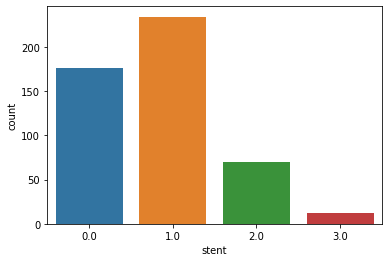

In [58]:
#graphical representation of our data
sns.countplot(x='stent',data=df)

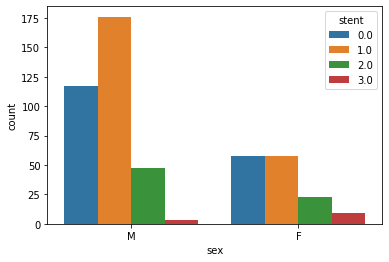

In [59]:
#graphical representation to show the effect of 'sex' on the no of 'stents'
sns.countplot(x='sex',hue='stent',data=df)

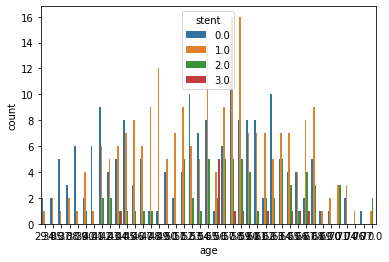

In [60]:
#graphical representation to show the effect of 'age' on the no of 'stents'
sns.countplot(x='age',hue='stent',data=df)

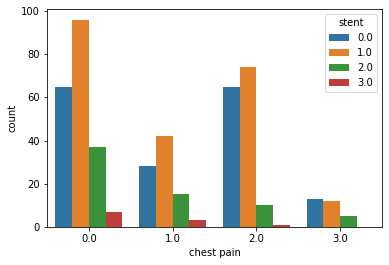

In [61]:
#graphical representation to show the effect of 'chest pain' on the no of 'stents'
sns.countplot(x='chest pain',hue='stent',data=df)

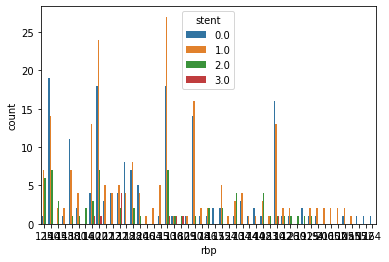

In [62]:
#graphical representation to show the effect of 'rbp' on the no of 'stents'
sns.countplot(x='rbp',hue='stent',data=df)

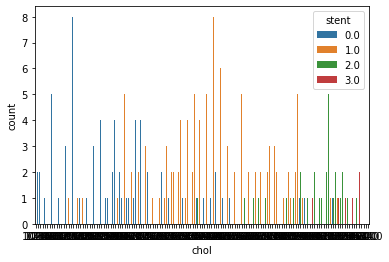

In [63]:
#graphical representation to show the effect of 'chol' on the no of 'stents'
sns.countplot(x='chol',hue='stent',data=df)

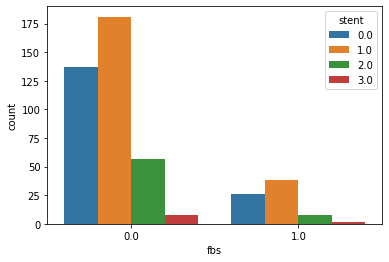

In [64]:
#graphical representation to show the effect of 'fbs' on the no of 'stents'
sns.countplot(x='fbs',hue='stent',data=df)

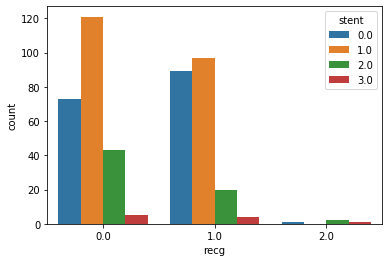

In [65]:
#graphical representation to show the effect of 'recg' on the no of 'stents'
sns.countplot(x='recg',hue='stent',data=df)

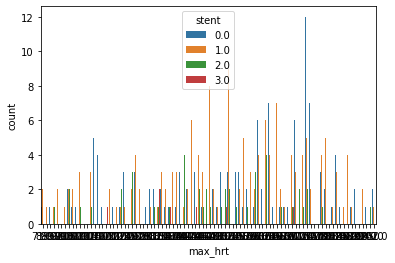

In [66]:
#graphical representation to show the effect of 'max_hrt' on the no of 'stents'
sns.countplot(x='max_hrt',hue='stent',data=df)

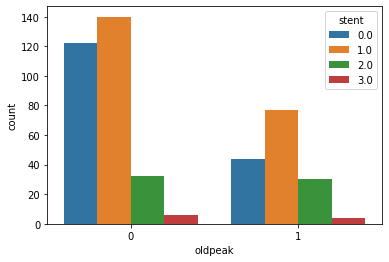

In [67]:
#graphical representation to show the effect of 'oldpeak' on the no of 'stents'
sns.countplot(x='oldpeak',hue='stent',data=df)

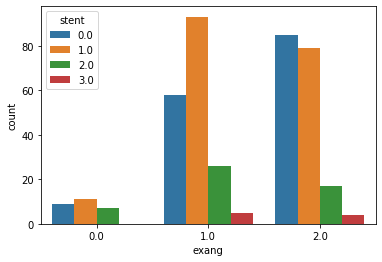

In [68]:
#graphical representation to show the effect of 'exang' on the no of 'stents'
sns.countplot(x='exang',hue='stent',data=df)

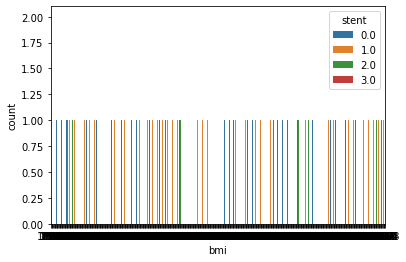

In [69]:
#graphical representation to show the effect of 'bmi' on the no of 'stents'
sns.countplot(x='bmi',hue='stent',data=df)

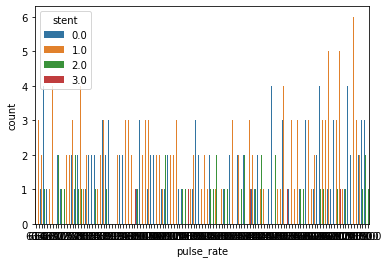

In [70]:
#graphical representation to show the effect of 'pulse_rate' on the no of 'stents'
sns.countplot(x='pulse_rate',hue='stent',data=df)

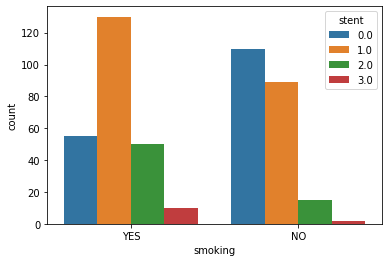

In [71]:
#graphical representation to show the effect of 'smoking' on the no of 'stents'
sns.countplot(x='smoking',hue='stent',data=df)

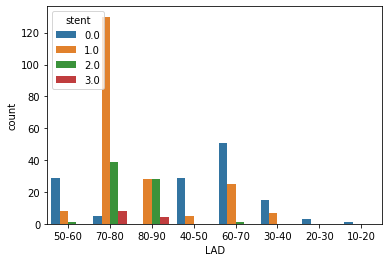

In [72]:
#graphical representation to show the effect of 'LAD' on the no of 'stents'
sns.countplot(x='LAD',hue='stent',data=df)

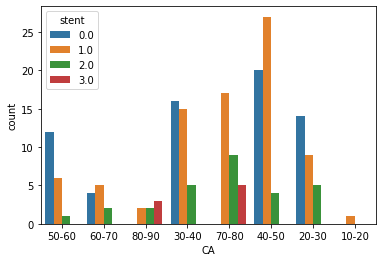

In [73]:
#graphical representation to show the effect of 'CA' on the no of 'stents'
sns.countplot(x='CA',hue='stent',data=df)

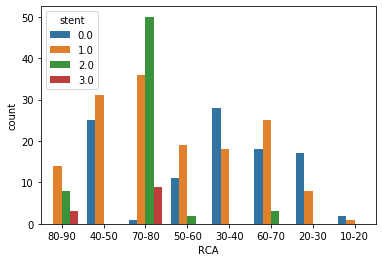

In [74]:
#graphical representation to show the effect of 'RCA' on the no of 'stents'
sns.countplot(x='RCA',hue='stent',data=df)

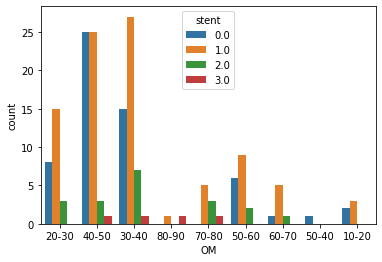

In [75]:
#graphical representation to show the effect of 'OM' on the no of 'stents'
sns.countplot(x='OM',hue='stent',data=df)

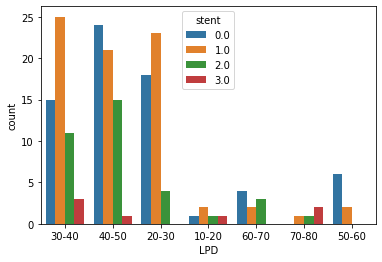

In [76]:
#graphical representation to show the effect of 'LPD' on the no of 'stents'
sns.countplot(x='LPD',hue='stent',data=df)

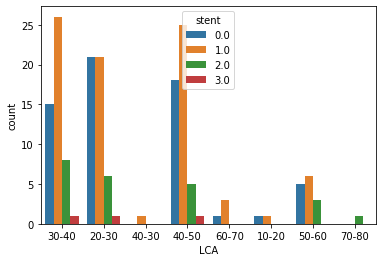

In [77]:
#graphical representation to show the effect of 'LCA' on the no of 'stents'
sns.countplot(x='LCA',hue='stent',data=df)

In [78]:
#removing the unnecessary columns that will not have any affect on the final outcome
lst=['p_no','Name','adm_dt','dis_dt']


In [79]:
df.drop(lst,axis=1,inplace=True)

In [80]:
#displaying the structure of the dataset to make sure that the columns have been successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
sex            491 non-null object
age            492 non-null float64
chest pain     473 non-null float64
rbp            445 non-null object
chol           441 non-null float64
fbs            457 non-null float64
recg           456 non-null float64
max_hrt        460 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
bmi            500 non-null float64
pulse_rate     480 non-null float64
smoking        461 non-null object
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(12), object(10)
memory usage: 86.1+ KB


In [81]:
#now,we are going to convert the catogorical data into numeric values in order to further calculations feasible
#we are creating the dummy variables of column 'sex':0-M,1-F
sex_m=pd.get_dummies(df['sex'],drop_first=True)
sex_m

,M
0,1
1,1
2,1
3,1
4,0
...,...
495,0
496,0
497,0
498,0


In [82]:
#we are creating the dummy variables of column 'smoking':0-NO,1-YES
smoking_y=pd.get_dummies(df['smoking'],drop_first=True)
smoking_y

,YES
0,1
1,1
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [83]:
#dropping the columns that contained the catagorical value
lst=['sex','smoking']
df.drop(lst,axis=1,inplace=True)

In [84]:
#displaying the structure of the dataset to make sure that the columns have been successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
age            492 non-null float64
chest pain     473 non-null float64
rbp            445 non-null object
chol           441 non-null float64
fbs            457 non-null float64
recg           456 non-null float64
max_hrt        460 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
bmi            500 non-null float64
pulse_rate     480 non-null float64
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(12), object(8)
memory usage: 78.2+ KB


In [85]:
#inserting the series in our dataset that contains the dummy numeric value of the column 'sex' and renaming it as 'sex'
df.insert(0, "sex",sex_m,True) 

In [86]:
#inserting the series in our dataset that contains the dummy numeric value of the column 'smoking' and renaming it as 'smoking'
df.insert(2, "smoking",smoking_y, True) 

In [87]:
#displaying the structure of the dataset to make sure that the series have been successfully inserted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
sex            500 non-null uint8
age            492 non-null float64
smoking        500 non-null uint8
chest pain     473 non-null float64
rbp            445 non-null object
chol           441 non-null float64
fbs            457 non-null float64
recg           456 non-null float64
max_hrt        460 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
bmi            500 non-null float64
pulse_rate     480 non-null float64
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(12), object(8), uint8(2)
memory usage: 79.2+ KB


In [88]:
#displaying the statistical data of our dtaset
df.describe()

,sex,age,smoking,chest pain,chol,fbs,recg,max_hrt,slope,exang,bmi,pulse_rate,stent,Unnamed: 25
count,500.000000,492.000000,500.000000,473.000000,441.000000,457.000000,456.000000,460.000000,390.000000,394.000000,500.000000,480.000000,492.000000,0.0
mean,0.686000,53.985772,0.490000,1.010571,238.621315,0.161926,0.478070,150.523913,1.028462,1.401015,36.360540,122.014583,0.833333,NaN
std,0.464581,9.254591,0.500401,1.003117,51.037013,0.368786,0.517349,23.775032,1.183666,0.614994,10.186917,35.887114,0.755608,NaN
min,0.000000,29.000000,0.000000,0.000000,104.000000,0.000000,0.000000,71.000000,0.000000,0.000000,19.090000,60.000000,0.000000,NaN
25%,0.000000,47.000000,0.000000,0.000000,205.000000,0.000000,0.000000,137.000000,0.000000,1.000000,27.360000,89.750000,0.000000,NaN
50%,1.000000,55.000000,0.000000,1.000000,235.000000,0.000000,0.000000,153.500000,0.800000,1.000000,36.385000,123.000000,1.000000,NaN
75%,1.000000,61.000000,1.000000,2.000000,271.000000,0.000000,1.000000,169.000000,1.600000,2.000000,45.452500,155.000000,1.000000,NaN
max,1.000000,77.000000,1.000000,3.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,53.880000,180.000000,3.000000,NaN


In [89]:
#for a normal distribution,the standard deviation should be 1
#here the columns 'age','chol','max_hrt','bmi','pulse_rate'
#have a very high standard deviation value so we need to transform them

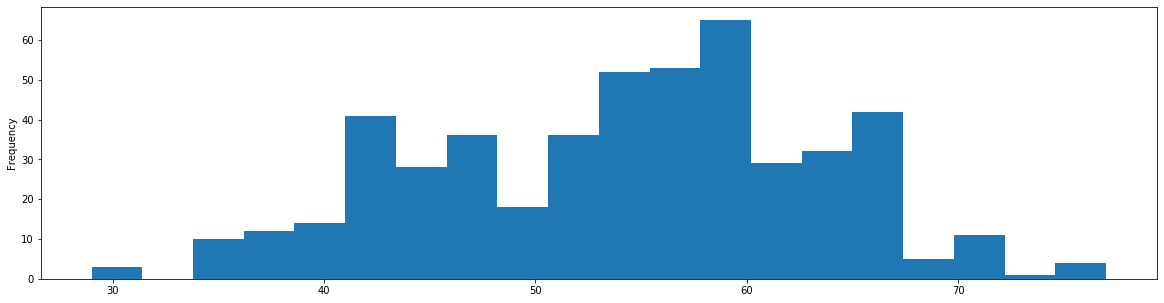

In [90]:
#plotting the histogram of column 'age' to check its skewness
df['age'].plot.hist(bins=20,figsize=(20,5))

In [91]:
#as the data is skewed,we are using square root transformation to remove the skewness
age_sqrt = df.age**(1/2)
age_sqrt.describe()

count    492.000000
mean       7.319390
std        0.642765
min        5.385165
25%        6.855655
50%        7.416198
75%        7.810250
max        8.774964
Name: age, dtype: float64

In [92]:
#now the standard deviation is near 1,so the skewness is removed


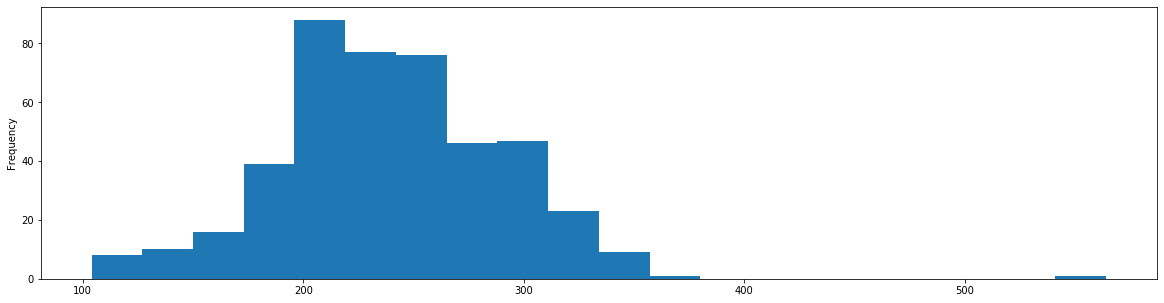

In [93]:
#plotting the histogram of column 'chol' to check its skewness
df['chol'].plot.hist(bins=20,figsize=(20,5))

In [94]:
#as the data is skewed,we are using square root transformation to remove the skewness
chol_sqt= df.chol**(1/2)
chol_sqt.describe()

count    441.000000
mean      15.359067
std        1.651233
min       10.198039
25%       14.317821
50%       15.329710
75%       16.462078
max       23.748684
Name: chol, dtype: float64

In [95]:
#now the standard deviation is near 1,so the skewness is removed


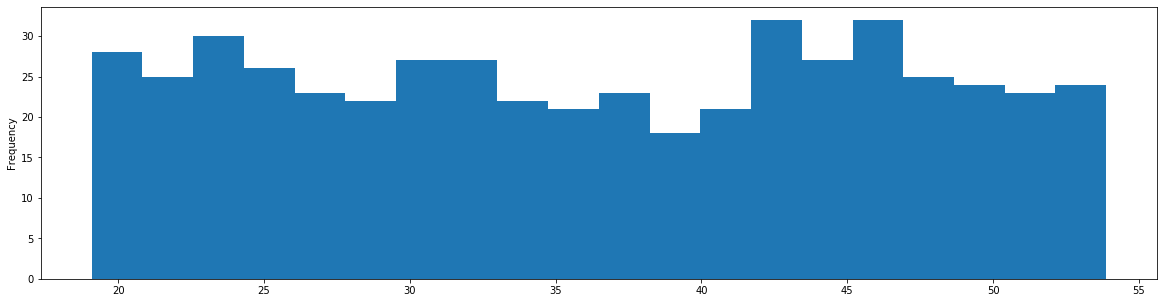

In [96]:
#plotting the histogram of column 'bmi' to check its skewness
df['bmi'].plot.hist(bins=20,figsize=(20,5))

In [97]:
#as the data is skewed,we are using square root transformation to remove the skewness
bmi_s = df.bmi**(1/2)
bmi_s.describe()

count    500.000000
mean       5.968007
std        0.863092
min        4.369210
25%        5.230679
50%        6.031996
75%        6.741847
max        7.340300
Name: bmi, dtype: float64

In [98]:
#now the standard deviation is near 1,so the skewness is removed


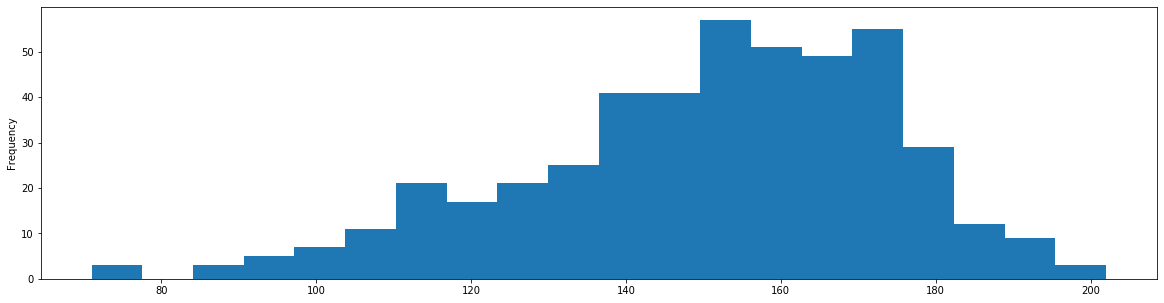

In [99]:
#plotting the histogram of column 'max_hrt' to check its skewness
df['max_hrt'].plot.hist(bins=20,figsize=(20,5))

In [100]:
#as the data is skewed,we are using square root transformation to remove the skewness
max_hrt_st= df.max_hrt**(1/2)
max_hrt_st.describe()

count    460.000000
mean      12.227695
std        1.004776
min        8.426150
25%       11.704700
50%       12.389495
75%       13.000000
max       14.212670
Name: max_hrt, dtype: float64

In [101]:
#now the standard deviation is near 1,so the skewness is removed


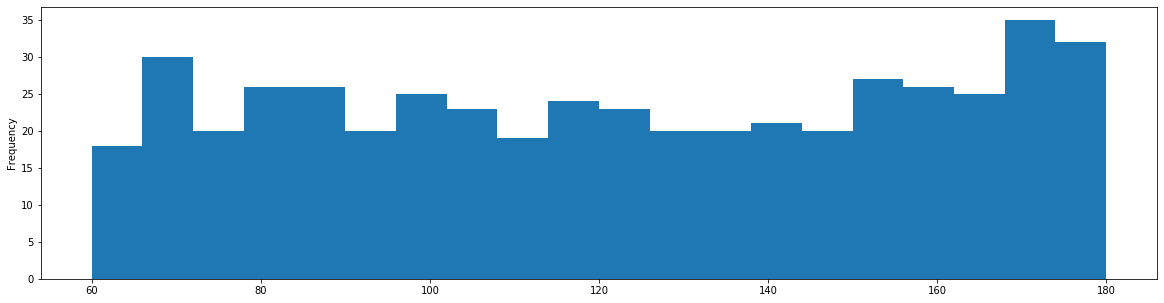

In [102]:
#plotting the histogram of column 'pulse_rate' to check its skewness
df['pulse_rate'].plot.hist(bins=20,figsize=(20,5))

In [103]:
#as the data is skewed,we are using square root transformation to remove the skewness
pulse_rate_srt= df.pulse_rate**(1/2)
pulse_rate_srt.describe()

count    480.000000
mean      10.919989
std        1.665596
min        7.745967
25%        9.473620
50%       11.090537
75%       12.449900
max       13.416408
Name: pulse_rate, dtype: float64

In [104]:
#now the standard deviation is near 1,so the skewness is removed


In [105]:
#removing the columns with the skewed data
lst=['age','chol','max_hrt','bmi','pulse_rate']

In [106]:
df.drop(lst,axis=1,inplace=True)

In [107]:
#displaying the data structure to make sure that the columns have been successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
sex            500 non-null uint8
smoking        500 non-null uint8
chest pain     473 non-null float64
rbp            445 non-null object
fbs            457 non-null float64
recg           456 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(7), object(8), uint8(2)
memory usage: 59.7+ KB


In [108]:
#inserting the series with the transformed data into the dataset
df.insert(2, "chol",chol_sqt,True) 

In [109]:
df.insert(1, "age",age_sqrt,True)

In [110]:
df.insert(5, "max_hrt",max_hrt_st,True)

In [111]:
df.insert(6, "bmi",bmi_s,True)

In [112]:
df.insert(7,"pulse_rate",pulse_rate_srt,True)

In [113]:
#displaying the structure of the dataset to make sure that our transformed data is successfully added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
sex            500 non-null uint8
age            492 non-null float64
smoking        500 non-null uint8
chol           441 non-null float64
chest pain     473 non-null float64
max_hrt        460 non-null float64
bmi            500 non-null float64
pulse_rate     480 non-null float64
rbp            445 non-null object
fbs            457 non-null float64
recg           456 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
LAD            417 non-null object
CA             184 non-null object
RCA            329 non-null object
OM             171 non-null object
LPD            186 non-null object
LCA            170 non-null object
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(12), object(8), uint8(2)
memory usage: 79.2+ KB


In [114]:
df['LAD'].value_counts()

70-80    182
60-70     77
80-90     60
50-60     38
40-50     34
30-40     22
20-30      3
10-20      1
Name: LAD, dtype: int64

In [115]:
#replacing the NaN values with literal "NA"
df["LAD"].fillna('NA', inplace = True) 

In [116]:
#displaying the values along with the frequency of column 'LAD'
df['LAD'].value_counts()

70-80    182
NA        83
60-70     77
80-90     60
50-60     38
40-50     34
30-40     22
20-30      3
10-20      1
Name: LAD, dtype: int64

In [117]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
label_encoder = preprocessing.LabelEncoder()  
df['LAD']= label_encoder.fit_transform(df['LAD']) 
df['LAD'].value_counts()

6    182
8     83
5     77
7     60
4     38
3     34
2     22
1      3
0      1
Name: LAD, dtype: int64

In [118]:
#replacing the NaN values with literal "NA"
df["CA"].fillna('NA', inplace = True)
#displaying the values along with the frequency of column 'CA'
df['CA'].value_counts()

NA       316
40-50     51
30-40     36
70-80     31
20-30     28
50-60     19
60-70     11
80-90      7
10-20      1
Name: CA, dtype: int64

In [119]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
df['CA']= label_encoder.fit_transform(df['CA']) 
df['CA'].value_counts()

8    316
3     51
2     36
6     31
1     28
4     19
5     11
7      7
0      1
Name: CA, dtype: int64

In [120]:
#replacing the NaN values with literal "NA"
df["RCA"].fillna('NA', inplace = True)
#displaying the values along with the frequency of column 'CA'
df['RCA'].value_counts()

NA       171
70-80     96
40-50     56
60-70     46
30-40     46
50-60     32
80-90     25
20-30     25
10-20      3
Name: RCA, dtype: int64

In [121]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
df['RCA']= label_encoder.fit_transform(df['RCA']) 
df['RCA'].value_counts()

8    171
6     96
3     56
5     46
2     46
4     32
7     25
1     25
0      3
Name: RCA, dtype: int64

In [122]:
#replacing the NaN values with literal "NA"
df["OM"].fillna('NA', inplace = True)
#displaying the values along with the frequency of column 'OM'
df['OM'].value_counts()

NA       329
40-50     54
30-40     50
20-30     26
50-60     17
70-80      9
60-70      7
10-20      5
80-90      2
50-40      1
Name: OM, dtype: int64

In [123]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
df['OM']= label_encoder.fit_transform(df['OM']) 
df['OM'].value_counts()

9    329
3     54
2     50
1     26
5     17
7      9
6      7
0      5
8      2
4      1
Name: OM, dtype: int64

In [124]:
#replacing the NaN values with literal "NA"
df["LPD"].fillna('NA', inplace = True)
#displaying the values along with the frequency of column 'LPD'
df['LPD'].value_counts()

NA       314
40-50     61
30-40     54
20-30     45
60-70      9
50-60      8
10-20      5
70-80      4
Name: LPD, dtype: int64

In [125]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
df['LPD']= label_encoder.fit_transform(df['LPD']) 
df['LPD'].value_counts()

7    314
3     61
2     54
1     45
5      9
4      8
0      5
6      4
Name: LPD, dtype: int64

In [126]:
#replacing the NaN values with literal "NA"
df["LCA"].fillna('NA', inplace = True)
#displaying the values along with the frequency of column 'LCA'
df['LCA'].value_counts()

NA       330
30-40     50
40-50     49
20-30     49
50-60     14
60-70      4
10-20      2
40-30      1
70-80      1
Name: LCA, dtype: int64

In [127]:
#as the data is catagrical,we are using label encoding to convert it into numeric values
df['LCA']= label_encoder.fit_transform(df['LCA']) 
df['LCA'].value_counts()

8    330
2     50
4     49
1     49
5     14
6      4
0      2
7      1
3      1
Name: LCA, dtype: int64

In [128]:
#as we have converted the data into numeric form,we are checking the statistical data of the columns
df.describe()

,sex,age,smoking,chol,chest pain,max_hrt,bmi,pulse_rate,fbs,recg,slope,exang,LAD,CA,RCA,OM,LPD,LCA,stent,Unnamed: 25
count,500.000000,492.000000,500.000000,441.000000,473.000000,460.000000,500.000000,480.000000,457.000000,456.000000,390.000000,394.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,492.000000,0.0
mean,0.686000,7.319390,0.490000,15.359067,1.010571,12.227695,5.968007,10.919989,0.161926,0.478070,1.028462,1.401015,5.724000,6.294000,5.524000,6.918000,5.270000,6.17800,0.833333,NaN
std,0.464581,0.642765,0.500401,1.651233,1.003117,1.004776,0.863092,1.665596,0.368786,0.517349,1.183666,0.614994,1.645978,2.486751,2.344444,3.066935,2.371571,2.69385,0.755608,NaN
min,0.000000,5.385165,0.000000,10.198039,0.000000,8.426150,4.369210,7.745967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,0.000000,6.855655,0.000000,14.317821,0.000000,11.704700,5.230679,9.473620,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,3.000000,3.000000,3.000000,4.00000,0.000000,NaN
50%,1.000000,7.416198,0.000000,15.329710,1.000000,12.389495,6.031996,11.090537,0.000000,0.000000,0.800000,1.000000,6.000000,8.000000,6.000000,9.000000,7.000000,8.00000,1.000000,NaN
75%,1.000000,7.810250,1.000000,16.462078,2.000000,13.000000,6.741847,12.449900,0.000000,1.000000,1.600000,2.000000,7.000000,8.000000,8.000000,9.000000,7.000000,8.00000,1.000000,NaN
max,1.000000,8.774964,1.000000,23.748684,3.000000,14.212670,7.340300,13.416408,1.000000,2.000000,6.200000,2.000000,8.000000,8.000000,8.000000,9.000000,7.000000,8.00000,3.000000,NaN


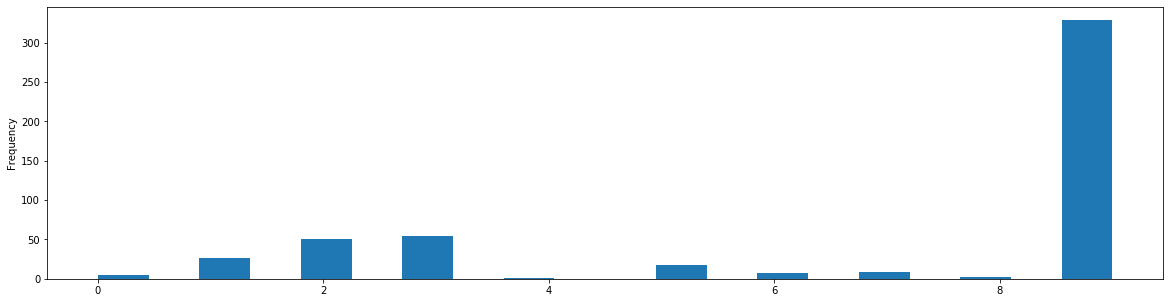

In [129]:
#the standard deviation of the column 'OM' is high,we need to transform it
#plotting the histogram of column 'pulse_rate' to check its skewness
df['OM'].plot.hist(bins=20,figsize=(20,5))


In [130]:
#as the data is skewed,we are using square root transformation to remove the skewness
OM_st= df.OM**(1/2)
OM_st.describe()

count    500.000000
mean       2.527739
std        0.727732
min        0.000000
25%        1.732051
50%        3.000000
75%        3.000000
max        3.000000
Name: OM, dtype: float64

In [131]:
#now the standard deviation is near 1,so the skewness is removed


In [132]:
#dropping the column consisting of skewed data
df.drop('OM',axis=1,inplace=True)

In [133]:
#inserting the series containing the transformed data into the dataset
df.insert(15, "OM",OM_st,True) 

In [134]:
#displayong the dataset structure to make sure the necessary changes are done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
sex            500 non-null uint8
age            492 non-null float64
smoking        500 non-null uint8
chol           441 non-null float64
chest pain     473 non-null float64
max_hrt        460 non-null float64
bmi            500 non-null float64
pulse_rate     480 non-null float64
rbp            445 non-null object
fbs            457 non-null float64
recg           456 non-null float64
oldpeak        455 non-null object
slope          390 non-null float64
exang          394 non-null float64
LAD            500 non-null int32
OM             500 non-null float64
CA             500 non-null int32
RCA            500 non-null int32
LPD            500 non-null int32
LCA            500 non-null int32
stent          492 non-null float64
Unnamed: 25    0 non-null float64
dtypes: float64(13), int32(5), object(2), uint8(2)
memory usage: 69.5+ KB


In [135]:
#dropping the unnamed column consisting of all NaN values
df.drop('Unnamed: 25',axis=1,inplace=True)

In [136]:
#dropping the columns consisting of NaN values
df.dropna(inplace=True)


In [137]:
df.isnull().sum()

sex           0
age           0
smoking       0
chol          0
chest pain    0
max_hrt       0
bmi           0
pulse_rate    0
rbp           0
fbs           0
recg          0
oldpeak       0
slope         0
exang         0
LAD           0
OM            0
CA            0
RCA           0
LPD           0
LCA           0
stent         0
dtype: int64

In [138]:
#checking all the unique values of column 'sex' to make sure its numeric
df['sex'].unique()

array([1, 0], dtype=uint64)

In [139]:
#checking all the unique values of column 'sex' to make sure its numeric
df['age'].unique()

array([7.21110255, 7.28010989, 8.36660027, 7.81024968, 7.87400787,
       7.61577311, 7.93725393, 7.41619849, 6.78232998, 7.34846923,
       8.42614977, 6.55743852, 5.83095189, 7.14142843, 7.07106781,
       7.74596669, 8.18535277, 6.70820393, 6.4807407 , 6.63324958,
       7.48331477, 7.54983444, 7.68114575, 8.        , 8.06225775,
       6.40312424, 8.1240384 , 6.164414  , 7.        , 6.92820323,
       5.38516481, 6.08276253, 6.8556546 , 8.24621125, 8.71779789,
       6.32455532, 8.77496439, 6.244998  , 8.30662386, 5.91607978,
       8.60232527])

In [140]:
#checking all the unique values of column 'smoking' to make sure its numeric
df['smoking'].unique()

array([1, 0], dtype=uint64)

In [141]:
#checking all the unique values of column 'chol' to make sure its numeric
df['chol'].unique()

array([14.56021978, 14.24780685, 16.55294536, 17.1464282 , 15.74801575,
       17.8325545 , 17.        , 15.77973384, 16.91153453, 12.20655562,
       18.46618531, 14.49137675, 16.73320053, 14.28285686, 15.62049935,
       14.52583905, 13.60147051, 14.93318452, 14.4222051 , 15.87450787,
       14.45683229, 17.52141547, 15.26433752, 17.8605711 , 16.        ,
       18.08314132, 13.        , 11.44552314, 16.40121947, 14.        ,
       15.19868415, 14.59451952, 16.46207763, 16.21727474, 15.13274595,
       18.97366596, 16.0623784 , 18.16590212, 18.49324201, 15.03329638,
       15.09966887, 16.673332  , 16.82260384, 15.5241747 , 13.22875656,
       13.7113092 , 14.73091986, 13.89244399, 15.65247584, 15.23154621,
       16.97056275, 14.03566885, 17.74823935, 14.6628783 , 12.80624847,
       18.05547009, 14.38749457, 13.3041347 , 16.03121954, 15.96871942,
       13.67479433, 14.17744688, 14.83239697, 16.37070554, 16.34013464,
       15.3622915 , 17.40689519, 16.79285562, 11.22497216, 17.57

In [142]:
#checking all the unique values of column 'chest pain' to make sure its numeric
df['chest pain'].unique()

array([0., 1., 2., 3.])

In [143]:
#checking all the unique values of column 'max_hrt' to make sure its numeric
df['max_hrt'].unique()

array([12.9614814 , 12.4498996 , 11.18033989, 12.68857754, 10.29563014,
       11.04536102, 11.83215957, 12.04159458, 12.        , 10.77032961,
       11.66190379, 13.85640646, 12.489996  , 12.72792206, 12.84523258,
       11.91637529, 12.16552506, 13.11487705, 13.15294644, 12.08304597,
       13.37908816, 12.32882801, 10.81665383, 10.72380529, 10.58300524,
       12.76714533, 12.12435565, 13.49073756, 10.24695077, 12.24744871,
       12.28820573, 13.        , 12.88409873, 13.34166406, 11.48912529,
       11.09053651, 11.78982612, 10.53565375, 13.41640786, 12.80624847,
       14.2126704 , 12.52996409, 12.60952021, 13.03840481, 11.74734012,
       13.22875656, 12.56980509, 11.22497216, 11.95826074, 12.64911064,
       11.87434209, 12.92284798,  9.74679434, 13.78404875, 10.86278049,
       10.14889157, 13.45362405, 10.39230485, 13.3041347 , 11.5758369 ,
       12.40967365, 12.36931688,  9.38083152, 13.19090596, 10.67707825,
       13.07669683, 11.53256259,  9.79795897, 11.13552873, 11.44

In [144]:
#checking all the unique values of column 'bmi' to make sure its numeric
df['bmi'].unique()

array([4.72228758, 7.10844568, 6.89129886, 4.82286222, 6.50922422,
       4.54312668, 5.76974869, 4.36921045, 6.78159273, 5.64358042,
       6.6053009 , 6.22334315, 5.29622507, 6.98856208, 5.20576603,
       6.75943785, 5.53172667, 4.83011387, 5.33666563, 4.95983871,
       5.66921511, 6.16116872, 6.31268564, 6.71714225, 5.61426754,
       4.48218697, 4.621688  , 4.44409721, 6.97997135, 7.09929574,
       4.49221549, 6.26178888, 4.96990946, 7.24913788, 5.39444158,
       5.33479147, 5.89745708, 4.56508488, 4.41474801, 7.10914903,
       6.61513416, 5.9126982 , 4.45084262, 6.86512928, 5.87026405,
       6.89782574, 4.84355242, 4.97795139, 6.10573501, 6.47379332,
       6.33798075, 6.7535176 , 4.98598034, 7.30342385, 5.58748602,
       5.1555795 , 4.4609416 , 4.93659802, 7.2518963 , 6.83447145,
       7.30753036, 7.22149569, 4.72757866, 5.04182507, 5.69736781,
       6.73721011, 5.50363516, 4.9689033 , 5.16720427, 6.95413546,
       6.55133574, 6.96203993, 5.96489732, 5.78878226, 7.20416

In [145]:
#checking all the unique values of column 'pulse_rate' to make sure its numeric
df['pulse_rate'].unique()

array([ 9.53939201,  7.81024968, 12.84523258,  8.83176087, 11.13552873,
       12.40967365,  9.2736185 ,  8.30662386, 11.18033989, 12.80624847,
       10.67707825, 13.03840481, 10.24695077, 11.22497216,  8.36660027,
       10.04987562, 13.11487705, 12.28820573, 12.4498996 ,  9.64365076,
       12.9614814 , 11.35781669, 10.        ,  8.1240384 , 13.37908816,
        8.42614977, 11.53256259, 12.68857754, 12.76714533, 12.08304597,
       10.44030651, 13.15294644, 12.52996409, 10.86278049, 11.74734012,
        9.16515139,  9.94987437, 10.53565375, 11.09053651, 12.12435565,
        9.21954446, 12.489996  , 12.92284798, 11.3137085 , 11.        ,
       10.48808848,  8.88819442,  9.69535971, 10.09950494,  8.24621125,
       10.29563014, 11.40175425,  9.43398113, 11.44552314, 13.22875656,
       13.3041347 ,  8.94427191, 11.26942767,  9.        , 10.90871211,
       10.77032961,  9.89949494, 10.63014581,  9.11043358, 11.48912529,
       11.04536102,  8.54400375, 12.88409873, 11.91637529,  9.32

In [146]:
#checking all the unique values of column 'rbp' to make sure its numeric
df['rbp'].unique()

array(['125', '140', '145', '148', '138', '100', '114', '160', '120',
       '122', '112', '132', '118', '128', '106', '104', '135', '130',
       '136', '180', '129', '150', '178', '146', '152', '154', '170',
       '124', '134', '174', '144', '108', '123', '110', '142', '126',
       '115', '94', '200', '165', '102', '105', 'NaN', '172', '164'],
      dtype=object)

In [147]:
#the values of column 'rbp' are catagorical

In [148]:
#checking all the unique values of column 'fbs' to make sure its numeric
df['fbs'].unique()

array([0., 1.])

In [149]:
#checking all the unique values of column 'recg' to make sure its numeric
df['recg'].unique()

array([1., 0., 2.])

In [150]:
#checking all the unique values of column 'oldpeak' to make sure its numeric
df['oldpeak'].unique()

array(['0', '1'], dtype=object)

In [151]:
#the values of the column 'oldpeak' is catagorical

In [152]:
#checking all the unique values of column 'slope' to make sure its numeric
df['slope'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.1,
       0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. , 5.6, 1.8,
       6.2, 4. , 2.2, 0.1, 0.5, 2.1, 1.5, 0.9, 3.8, 1.3, 2.4, 3.5, 2.3])

In [153]:
#checking all the unique values of column 'exang' to make sure its numeric
df['exang'].unique()

array([2., 0., 1.])

In [154]:
#checking all the unique values of column 'LAD' to make sure its numeric
df['LAD'].unique()

array([4, 6, 7, 3, 5, 8, 2, 1, 0], dtype=int64)

In [155]:
#checking all the unique values of column 'OM' to make sure its numeric
df['OM'].unique()

array([1.        , 3.        , 1.73205081, 1.41421356, 2.82842712,
       2.64575131, 2.23606798, 2.44948974, 2.        , 0.        ])

In [156]:
#checking all the unique values of column 'CA' to make sure its numeric
df['CA'].unique()

array([8, 4, 5, 7, 2, 6, 3, 1], dtype=int64)

In [157]:
#checking all the unique values of column 'RCA' to make sure its numeric
df['RCA'].unique()

array([7, 3, 6, 8, 4, 2, 5, 1, 0], dtype=int64)

In [158]:
#checking all the unique values of column 'LPD' to make sure its numeric
df['LPD'].unique()

array([7, 2, 3, 1, 0, 5, 6, 4], dtype=int64)

In [159]:
#checking all the unique values of column 'LCA' to make sure its numeric
df['LCA'].unique()

array([2, 8, 1, 3, 4, 6, 0, 5], dtype=int64)

In [160]:
#checking all the unique values of column 'stent' to make sure its numeric
df['stent'].unique()

array([1., 2., 0., 3.])

In [161]:
#since the data values of column 'rbp' was catagorical,we converted it into numeric data using line encoding
df['rbp']= label_encoder.fit_transform(df['rbp']) 
df['rbp'].value_counts()

11    44
19    37
25    30
31    27
6     24
34    17
24    15
17    13
20    13
10     9
15     9
12     7
32     7
7      7
21     7
37     6
14     6
5      6
22     6
23     4
9      4
0      4
28     4
26     4
27     3
29     3
16     3
30     3
3      3
43     2
40     2
1      2
2      2
42     2
41     2
36     2
39     2
18     2
8      1
38     1
35     1
4      1
13     1
33     1
44     1
Name: rbp, dtype: int64

In [162]:
#since the data values of column 'oldpeak' was catagorical,we converted it into numeric data using line encoding
df['oldpeak']= label_encoder.fit_transform(df['oldpeak']) 
df['oldpeak'].value_counts()

0    229
1    121
Name: oldpeak, dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 491
Data columns (total 21 columns):
sex           350 non-null uint8
age           350 non-null float64
smoking       350 non-null uint8
chol          350 non-null float64
chest pain    350 non-null float64
max_hrt       350 non-null float64
bmi           350 non-null float64
pulse_rate    350 non-null float64
rbp           350 non-null int32
fbs           350 non-null float64
recg          350 non-null float64
oldpeak       350 non-null int32
slope         350 non-null float64
exang         350 non-null float64
LAD           350 non-null int32
OM            350 non-null float64
CA            350 non-null int32
RCA           350 non-null int32
LPD           350 non-null int32
LCA           350 non-null int32
stent         350 non-null float64
dtypes: float64(12), int32(7), uint8(2)
memory usage: 45.8 KB


In [164]:
#now all the values are in numeric form,we can calculate its f-value and probability to select the most relevant columns

In [165]:
#X:input data or the independent variables
#y:output data or the dependent variable

In [166]:
X = df.drop('stent',axis=1)
y=df['stent']


In [167]:
#calculating the f-value and probability of the columns
di={}
fvalue,prob=feature_selection.f_classif(X,y)
for col,f,p in zip(X.columns,fvalue,prob):
    di[col]=[f,p]
f_p=pd.DataFrame(di)
f_p.rename(index={0:"F-value",1:"Probability"})

,sex,age,smoking,chol,chest pain,max_hrt,bmi,pulse_rate,rbp,fbs,recg,oldpeak,slope,exang,LAD,OM,CA,RCA,LPD,LCA
F-value,4.690801,5.600983,1.219611e+01,1.274522e+02,4.637773,3.034880,0.898452,0.546274,0.365083,0.451486,2.083248,4.602126,1.612351,2.077481,2.768223e+01,1.901908,1.074899,2.599074,0.625551,0.192467
Probability,0.003170,0.000925,1.323291e-07,1.283085e-55,0.003406,0.029293,0.442137,0.650960,0.778258,0.716407,0.102145,0.003574,0.186213,0.102909,4.547895e-16,0.128965,0.359736,0.052126,0.598905,0.901506


In [168]:
#feature_selection module calculates f-values and probabilities of every column
#Based on the f-values and probabilities, we got an idea of columns to be dropped
#Higher the f-value and lower the probability, higher is the influence of that column on the dependent variable
lst=['fbs','rbp','LCA','LPD','pulse_rate','recg']

In [169]:
df.drop(lst,axis=1,inplace=True)

In [170]:
#displaying the structure of the dataset to make sure the changes are done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 491
Data columns (total 15 columns):
sex           350 non-null uint8
age           350 non-null float64
smoking       350 non-null uint8
chol          350 non-null float64
chest pain    350 non-null float64
max_hrt       350 non-null float64
bmi           350 non-null float64
oldpeak       350 non-null int32
slope         350 non-null float64
exang         350 non-null float64
LAD           350 non-null int32
OM            350 non-null float64
CA            350 non-null int32
RCA           350 non-null int32
stent         350 non-null float64
dtypes: float64(9), int32(4), uint8(2)
memory usage: 33.5 KB


In [171]:
X = df.drop('stent',axis=1)
y=df['stent']


In [172]:
#splitting the dataset into train and test
#the train set will be used to train the model
#the test set will be used to test the model
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [173]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# training a DescisionTreeClassifier 
from sklearn import metrics
dtree = DecisionTreeClassifier().fit(X_train, y_train) 
dtree_predictions = dtree.predict(X_test) 
# accuracy on X_test 
accuracy = dtree.score(X_test, y_test) 
print("accuracy:")
print(accuracy)
#creating the confusion matrix
 
print(metrics.confusion_matrix(y_test,dtree_predictions))
#the classification report is printed
print(metrics.classification_report(y_test, dtree_predictions))


accuracy:
0.780952380952381
[[29  6  1  0]
 [ 2 44  6  0]
 [ 0  5  7  2]
 [ 0  0  1  2]]
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        36
         1.0       0.80      0.85      0.82        52
         2.0       0.47      0.50      0.48        14
         3.0       0.50      0.67      0.57         3

    accuracy                           0.78       105
   macro avg       0.68      0.70      0.69       105
weighted avg       0.79      0.78      0.78       105



In [174]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier 
#training the knn classifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("accuracy:")
print(accuracy)

# creating a confusion matrix 
knn_predictions = knn.predict(X_test) 
#creating the confusion matrix
print(metrics.confusion_matrix(y_test,knn_predictions))
#the classification report is printed
print(metrics.classification_report(y_test, knn_predictions))

accuracy:
0.7142857142857143
[[23 13  0  0]
 [ 6 43  3  0]
 [ 0  6  8  0]
 [ 0  0  2  1]]
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71        36
         1.0       0.69      0.83      0.75        52
         2.0       0.62      0.57      0.59        14
         3.0       1.00      0.33      0.50         3

    accuracy                           0.71       105
   macro avg       0.78      0.59      0.64       105
weighted avg       0.73      0.71      0.71       105



In [175]:
#naive bayes

# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print("accuracy:")
print(accuracy)

#creating the confusion matrix
print(metrics.confusion_matrix(y_test,gnb_predictions))
#the classification report is printed
print(metrics.classification_report(y_test, gnb_predictions))

accuracy:
0.7619047619047619
[[26 10  0  0]
 [ 4 46  1  1]
 [ 0  5  5  4]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

         0.0       0.87      0.72      0.79        36
         1.0       0.75      0.88      0.81        52
         2.0       0.83      0.36      0.50        14
         3.0       0.38      1.00      0.55         3

    accuracy                           0.76       105
   macro avg       0.71      0.74      0.66       105
weighted avg       0.79      0.76      0.76       105



In [176]:
from sklearn.ensemble import RandomForestClassifier
#training the random forest classifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
rnd_predictions = forest.predict(X_test) 
# accuracy on X_test 
accuracy = forest.score(X_test, y_test) 
print("accuracy:")
print(accuracy)
#creating the confusion matrix
print(metrics.confusion_matrix(y_test,rnd_predictions))
#the classification report is printed
print(metrics.classification_report(y_test, rnd_predictions))

accuracy:
0.7428571428571429
[[29  7  0  0]
 [ 9 43  0  0]
 [ 0  8  5  1]
 [ 0  0  2  1]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        36
         1.0       0.74      0.83      0.78        52
         2.0       0.71      0.36      0.48        14
         3.0       0.50      0.33      0.40         3

    accuracy                           0.74       105
   macro avg       0.68      0.58      0.61       105
weighted avg       0.74      0.74      0.73       105



In [177]:
#as the decision tree classifier model has the maximum accuracy,it shall be used to implement the model

In [178]:
#help('modules')

In [179]:
#import joblib
#dtree_model=open("dtree_model.pkl","wb")
#joblib.dump(dtree,dtree_model)

In [180]:
#dtree_model.close()

In [181]:
df.to_csv('stent.csv')

In [182]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [183]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [188]:
pip install ipynb-py-convert

  Created wheel for ipynb-py-convert: filename=ipynb_py_convert-0.4.5-cp37-none-any.whl size=4328 sha256=ca696586ac7b02f47c3a875bed89a4e153b2de6757fb463f5c1f30af9583339b
  Stored in directory: C:\Users\Prachee\AppData\Local\pip\Cache\wheels\d4\99\01\24932d0201ed03d2d9e129b40f8e933e8ab51329ed88380cdc
Successfully built ipynb-py-convert
Note: you may need to restart the kernel to use updated packages.


In [193]:
#!jupyter nbconvert --to script enigma.ipynb

SyntaxError: invalid syntax (<ipython-input-193-26cdd53ada53>, line 1)

In [194]:
ipynb-py-convert enigma.py enigma.ipynb

SyntaxError: invalid syntax (<ipython-input-194-4937bcadc227>, line 1)